<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">




# <center> **04. Pandas Introduction to temporal series!** </center>



## **Outline**
1. **Pandas  temporal series**
2. **Working with synchronized data from different sources**




In [1]:
#@title Execute this cell
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20252-C1" #@param {type:"string"}
assignment_id = group_id +'.pandas'
student_id = "2211233" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [2]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [3]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "/ai-uis-student-master" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/ai-uis-student-master


In [4]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'2.2.2'

#**1. Time series with an example**

Now, we are use a more specific dataset to see the pandas funtionalities in time. To see much better this kind of functionalities we will use a new dataset.

Vamos a usar la recolección de un indice climático **AO (Oscilación Ártica)**, used to describe the states and climate changes.

* Positive **AO+** when pressure differences is high,  the western winds from the Atlantic are intense over Europe and run through high latitudes, providing mild winters (inviernos templados) to the continent

* Negative **AO-** when pressure differences is low, winters very cool...like in game of thrones!


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/aonao.png" style="width:500px;">

We will convert in a pandas serie structure with monthly frequency


In [5]:
#@title **code**: Read temporal serie data
ao = np.loadtxt('data/monthly_ao.txt')
print(ao.shape)
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')
dates

(823, 3)


/tmp/ipython-input-1706045951.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')


DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31'],
              dtype='datetime64[ns]', length=823, freq='ME')

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
Freq: ME, dtype: float64


<Axes: >

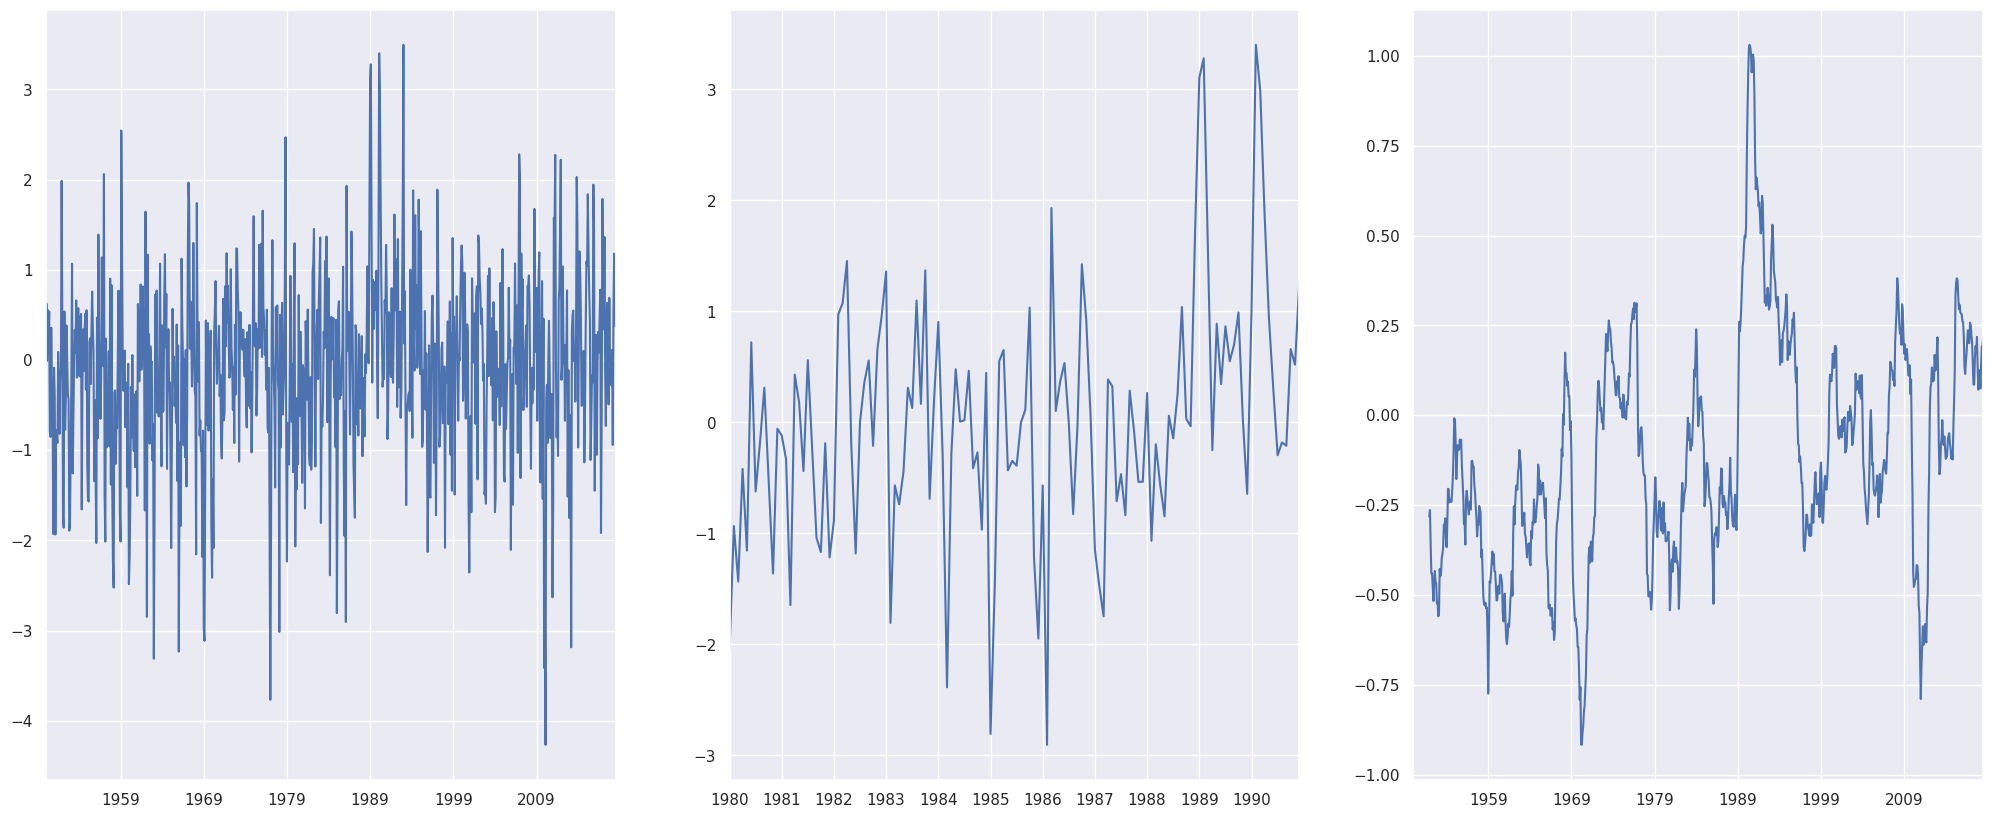

In [6]:
#@title **code** visualize series
AO = pd.Series(ao[:,2], index=dates)
print(AO.head())
plt.figure(figsize = (25, 10))
ax= plt.subplot(1,3,1)
AO.plot();
ax= plt.subplot(1,3,2)
AO['1980':'1990'].plot()
ax= plt.subplot(1,3,3)
AO.rolling(24).mean().plot()

In [15]:
AO.loc[(AO.index.year == 1981) & (AO.index.month == 2)]

,0
1981-02-28,-0.33158


In [7]:
#@title **code** Preprocessing: SELECTING BY YEAR
AO['1960']

,0
1960-01-31,-2.484200
1960-02-29,-2.212400
1960-03-31,-1.624600
1960-04-30,-0.297310
1960-05-31,-0.857430
1960-06-30,0.054978
1960-07-31,-0.619060
1960-08-31,-1.007900
1960-09-30,-0.381640
1960-10-31,-1.187000


/tmp/ipython-input-1831980766.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  AO_mm = AO.resample("A").mean()
/tmp/ipython-input-1831980766.py:5: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  AO_mm = AO.resample("A").median()


<Axes: >

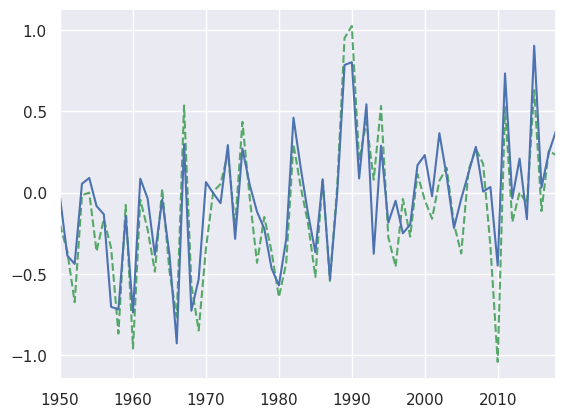

In [8]:
#@title **code**
#@markdown Pandas provide easy way to resample data to different time frequency
AO_mm = AO.resample("A").mean()
AO_mm.plot(style='g--')
AO_mm = AO.resample("A").median()
AO_mm.plot()

/tmp/ipython-input-316663523.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
/tmp/ipython-input-316663523.py:3: FutureWarning: The provided callable <function min at 0x7cd3e55300e0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
/tmp/ipython-input-316663523.py:3: FutureWarning: The provided callable <function max at 0x7cd3e550ff60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  AO_mm = AO.resample("A").apply(['mean', np.min, np.max])


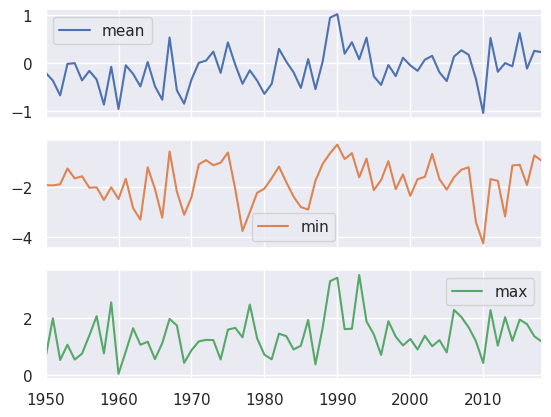

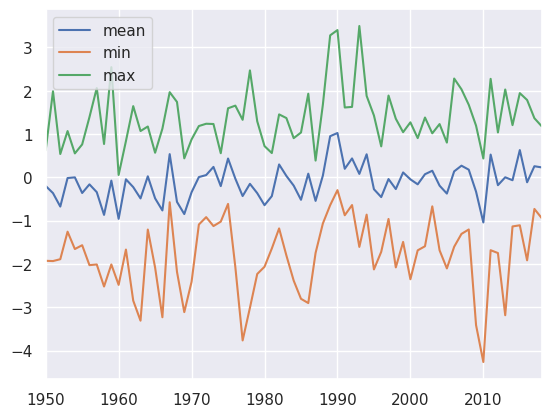

In [12]:
#@title **code**
#@markdown Resample with other operation, for instance min and max.
AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
AO_mm['1900':'2020'].plot(subplots=True);
AO_mm['1900':'2020'].plot();

1950-01-31 00:00:00   -0.06031
1950-01-31 12:00:00   -0.06031
1950-02-01 00:00:00   -0.06031
1950-02-01 12:00:00   -0.06031
1950-02-02 00:00:00   -0.06031
Freq: 12h, dtype: float64
(50037,)
1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
Freq: ME, dtype: float64
(823,)


/tmp/ipython-input-47029997.py:2: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  AO_res =AO.resample(pd.Timedelta("12h")).fillna(method="pad")


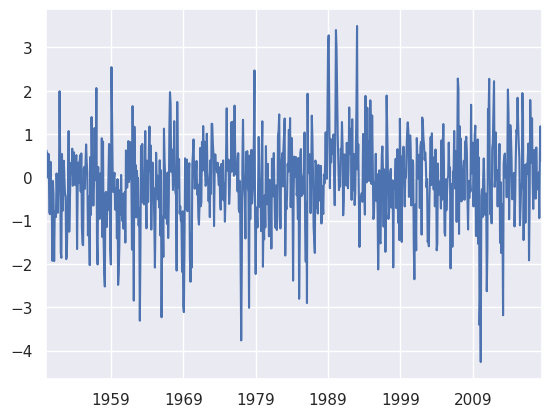

In [11]:
#@title **code: oversampling**
AO_res =AO.resample(pd.Timedelta("12h")).fillna(method="pad")
print(AO_res.head())
print(AO_res.shape)
AO.plot()
print(AO.head())
print(AO.shape)

# 2.  **Working with synchronized data from different sources**


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/aonao.png" style="width:500px;">

- Now, we will load data about other sensor: **The AO information**

In [ ]:
#@title **code** using two series-files in a unique Dataframe
nao = np.loadtxt('data/monthly_anao.txt')
dates_nao = pd.date_range('1950-01', periods=nao.shape[0], freq='M')

ao = np.loadtxt('data/monthly_ao.txt')
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')

AO = pd.Series(ao[:,2], index=dates)
NAO = pd.Series(nao[:,2], index=dates_nao)
NAO.index

In [ ]:
#@title **code**
aonao = pd.DataFrame({'AO' : AO, 'NAO' : NAO})
aonao.plot(subplots=True)

aonao.head()

In [ ]:
#@title **code** We can simply add column to the Data Frame:
aonao['Diff'] = aonao['AO'] - aonao['NAO']
aonao.head()

In [ ]:
#@title **code** Rolling mean:
aonao.rolling(window=32, center=False).mean().plot(style='--')
del aonao['Diff']

In [ ]:
#@title **code** correlating variables but temporally!!
aonao.AO.rolling(window=120).corr(other=aonao.NAO).plot(style='-r')
aonao.corr()

## Referencias

[1] official panda doc sites:http://pandas.pydata.org/pandas-docs/stable/index.html

[2] Description of a dataset: https://www.kaggle.com/camnugent/california-housing-prices

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
